# AFL-2
Michell Thesea C - 0706022110003

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
df = pd.read_csv("customer_analysis.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning and Preparation
1. Missing values
2. date_time format
3. categorical feature that needs to be encoded into numerical format

In [3]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [4]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,7004,9817,8080,9432,8372,10870,4001,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-05-08 00:00:00,2013-06-06 00:00:00,2014-03-13 00:00:00,...,2013-03-16 00:00:00,2012-08-21 00:00:00,2012-08-17 00:00:00,2013-06-02 00:00:00,2013-07-01 00:00:00,2013-06-13 00:00:00,2014-06-10 00:00:00,2014-01-25 00:00:00,2014-01-24 00:00:00,2012-10-15 00:00:00
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84


# Feature Engineering (Create/Remove feature from available data):

1. Age Extraction: We'll unveil the age of each customer by deciphering their birth year from the "Year_Birth."

In [8]:
import datetime
current_year = datetime.datetime.now().year

# Subtract the birth year from the current year to get the age
df['Age'] = current_year - df['Year_Birth']

2. Spending Power: Introducing "Spent," a dynamic feature showcasing the total expenditure across various categories over the past two years.

In [9]:
df['Spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntFishProducts']+ df['MntGoldProds']+ df['NumDealsPurchases']+ df['NumWebPurchases']+ df['NumCatalogPurchases']+ df['NumStorePurchases']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

3. Household Living Arrangement: craft "Living_With" from "Marital_Status," revealing the living arrangements of  valued couples.

In [10]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
marital_status_mapping = {
    'Single': 1,
    'Married': 2,
    'Together': 2,
    'Widow': 1,
    'Divorced': 1,
    'YOLO': 1
}

df['Living_With'] = df['Marital_Status'].map(marital_status_mapping)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,66,1726,1.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,69,34,1.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,887,2.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,39,68,2.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,460,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,56,1283,2.0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,77,466,2.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,42,1280,1.0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,67,916,2.0


4. Family Dynamics: "Children" will emerge, quantifying the number of children in a household, encompassing both the young ones and teenagers.

In [12]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,66,1726,1.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,69,34,1.0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,58,887,2.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,39,68,2.0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,42,460,2.0,1


5. Family Unity: "Family_Size" will take shape, providing insights into the size and structure of each household.

In [13]:
df['Family_Size'] = df['Children'] + df['Living_With']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,66,1726,1.0,0,1.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,69,34,1.0,2,3.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,58,887,2.0,0,2.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,39,68,2.0,1,3.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,42,460,2.0,1,3.0


6. Parental Status: "Is_Parent" will be born, simplifying the journey of parenthood for our customers.

In [14]:
df['Is_Parent'] = (df['Children'] > 0).astype(int)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,66,1726,1.0,0,1.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,69,34,1.0,2,3.0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,887,2.0,0,2.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,39,68,2.0,1,3.0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,460,2.0,1,3.0,1


7. Educational Evolution: "Education" will undergo a transformation, restructured into three distinct categories for clarity.


In [15]:
df['Education'] = df['Education'].apply(lambda x: 'Undergraduate' if x in ['Graduation', 'Basic'] else 'Graduate' if x == 'Master' else 'Postgraduate' if x == 'PhD' else x)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,66,1726,1.0,0,1.0,0
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,69,34,1.0,2,3.0,1
2,4141,1965,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,887,2.0,0,2.0,0
3,6182,1984,Undergraduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,39,68,2.0,1,3.0,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,460,2.0,1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,56,1283,2.0,1,3.0,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,77,466,2.0,3,5.0,1
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,42,1280,1.0,0,1.0,0
2238,8235,1956,Graduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,67,916,2.0,1,3.0,1


8. Farewell to Redundancy: We'll bid adieu to redundant features, streamlining our dataset for a sleek and insightful analysis.


In [16]:
df.drop(['ID','Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

# Data Preparation

1. Label Encoding: Translate categorical features into numbers so that your algorithms can work their magic.

In [17]:
label_encoder = LabelEncoder()
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,3,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1726,1.0,0,1.0,0
1,3,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,34,1.0,2,3.0,1
2,3,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,887,2.0,0,2.0,0
3,3,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,68,2.0,1,3.0,1
4,2,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,460,2.0,1,3.0,1


2. Scaling: Using the standard scaler to put all features on the same playing field, making it easier for your algorithms to do their thing.

In [18]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.810244,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,...,-0.262111,-0.11651,-0.097282,2.388846,0.985345,1.766748,-1.351124,-1.264505,-1.761380,-1.584605
1,0.810244,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,1.235733,-0.963547,-1.351124,1.396361,0.445282,0.631072
2,0.810244,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,...,-0.262111,-0.11651,-0.097282,-0.418612,0.317643,0.412896,0.740124,-1.264505,-0.658049,-1.584605
3,0.810244,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.268149,-0.908683,0.740124,0.065928,0.445282,0.631072
4,-0.178828,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.017761,-0.276132,0.740124,0.065928,0.445282,0.631072


In [19]:
scaled_df.isna().any()

Education              False
Income                 False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Spent                  False
Living_With             True
Children               False
Family_Size             True
Is_Parent              False
dtype: bool

In [20]:
scaled_df = scaled_df.dropna(subset=['Family_Size', 'Living_With'])

3. Dimensionality Reduction: Creating a smaller, more manageable subset of data, simplifying the complexity for smoother analysis. (may or may not be used)

In [21]:
subset_df = df[df['Age'] < 30]
subset_df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
46,0,7500.0,24,3,18,14,15,22,50,3,...,0,0,0,1,27,125,2.0,0,2.0,0
417,3,80134.0,11,966,26,282,52,26,26,1,...,1,1,0,0,29,1425,2.0,0,2.0,0
696,3,34824.0,65,4,2,11,2,0,4,1,...,0,0,0,0,28,29,1.0,0,1.0,0
747,3,71163.0,30,283,17,372,138,106,44,1,...,0,0,0,0,28,1016,1.0,0,1.0,0
914,3,95529.0,29,770,29,890,250,27,24,1,...,0,0,0,1,29,2231,1.0,0,1.0,0
995,3,34824.0,65,4,2,11,2,0,4,1,...,0,0,0,0,28,29,1.0,0,1.0,0
1163,3,80685.0,55,241,45,604,34,26,54,1,...,0,0,0,0,29,1033,2.0,0,2.0,0
1170,3,14421.0,81,0,0,2,3,3,8,1,...,0,0,0,0,27,20,2.0,0,2.0,0
1850,0,83257.0,56,536,27,590,38,107,67,1,...,0,0,1,1,28,1324,1.0,0,1.0,0
2213,0,80617.0,42,594,51,631,72,55,32,1,...,0,0,0,0,28,1471,1.0,0,1.0,0


# Clustering

1. Elbow Method: We'll pinpoint the ideal number of clusters.

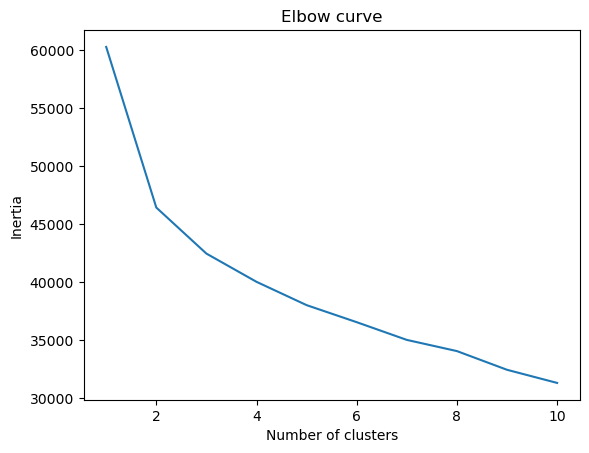

In [22]:
inertia = []

# Range of clusters to test
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

2. Agglomerative Clustering: The heart of our clustering journey.

In [23]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster = hc.fit_predict(scaled_df)
cluster

/Users/michelltc/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, ..., 2, 2, 1])

3. Scatter Plot Revelations: We'll unveil the cluster patterns using scatter plots. 

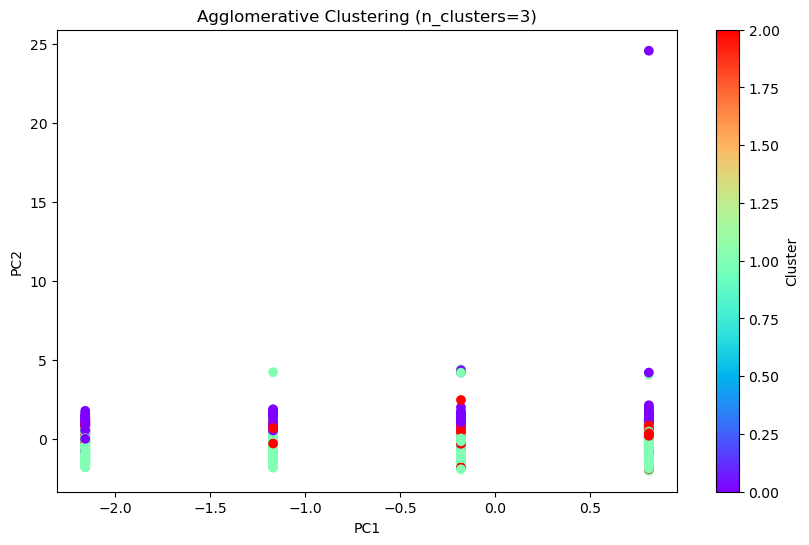

In [32]:
plt.figure(figsize=(10, 6))

cluster_cmap = sns.color_palette('rainbow', as_cmap=True)
scatter = plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=cluster, cmap=cluster_cmap)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering (n_clusters=3)')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

# Visualization

1. you may use scatterplots, swarmplot, boxenplot to evaluate your clustering models

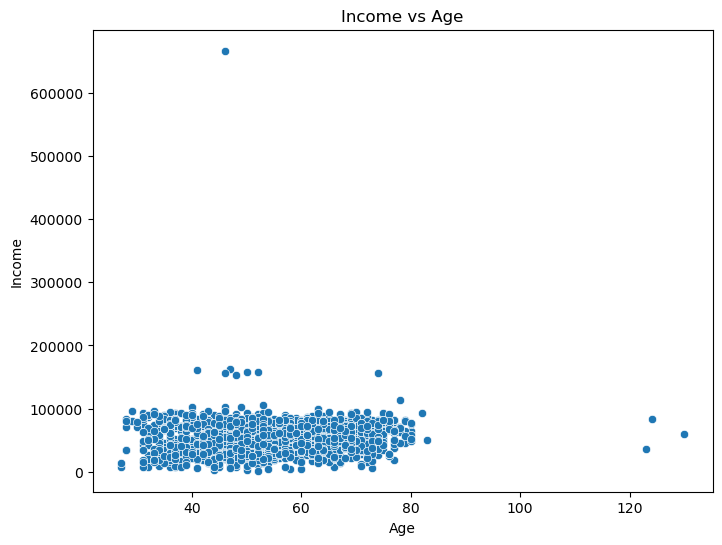

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Income vs Age')
plt.show()

2. draw distribution of cluster chart

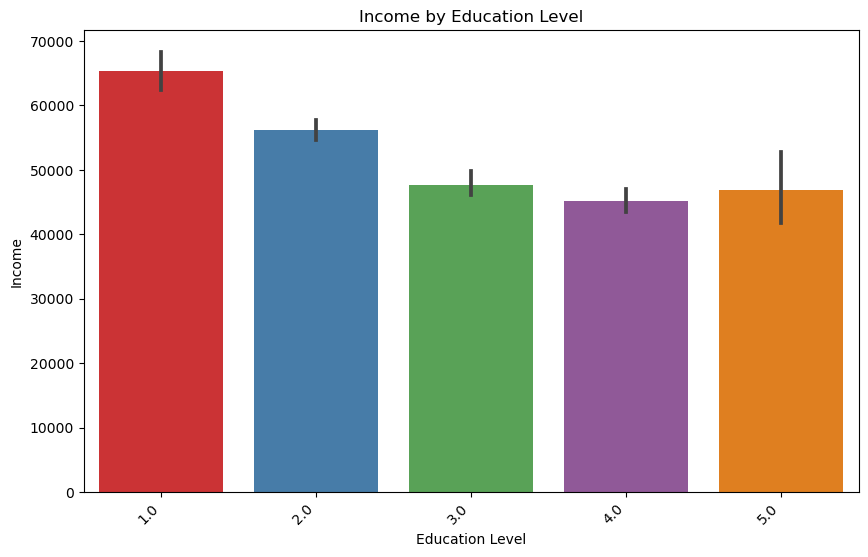

In [26]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Family_Size', y='Income', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Income by Education Level')

# Rotate x-axis labels for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [28]:
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,3,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1726,1.0,0,1.0,0
1,3,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,34,1.0,2,3.0,1
2,3,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,887,2.0,0,2.0,0
3,3,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,68,2.0,1,3.0,1
4,2,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,460,2.0,1,3.0,1


3. profiling between income and spending cluster

/var/folders/9f/z4f5qxnj21d6zsj419hzs5yw0000gn/T/ipykernel_64573/2051756415.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Income', y='Spent', palette='Set1')


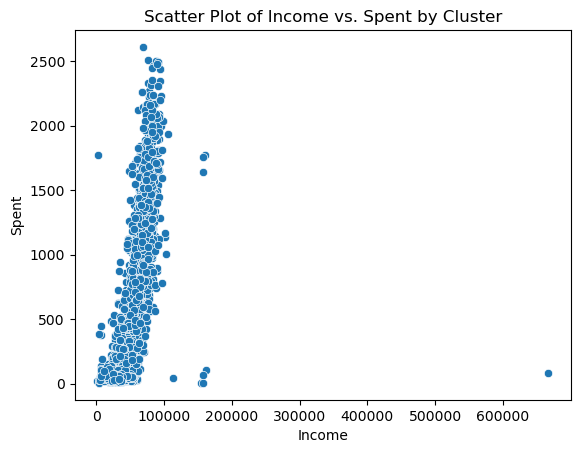

In [36]:
sns.scatterplot(data=df, x='Income', y='Spent', palette='Set1')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Scatter Plot of Income vs. Spent by Cluster')

plt.show()